In [1]:
#EDA of simpsons dataset to understand the data and to get some insights

#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
#create dataframe of csv which contains details about all simpsons episodes, dropping rows with missing values

df = pd.read_csv('simpsons_episodes.csv').dropna()
print(df.shape)

(593, 14)


In [10]:
#show head of df
df.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      593 non-null    int64  
 1   image_url               593 non-null    object 
 2   imdb_rating             593 non-null    float64
 3   imdb_votes              593 non-null    float64
 4   number_in_season        593 non-null    int64  
 5   number_in_series        593 non-null    int64  
 6   original_air_date       593 non-null    object 
 7   original_air_year       593 non-null    int64  
 8   production_code         593 non-null    object 
 9   season                  593 non-null    int64  
 10  title                   593 non-null    object 
 11  us_viewers_in_millions  593 non-null    float64
 12  video_url               593 non-null    object 
 13  views                   593 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory 

In [12]:
#remove unnecessary columns
df.drop(['image_url', 'production_code', 'video_url'], axis= 1, inplace= True) 
#sort by episode
df.sort_values(by=['number_in_series'], inplace= True)

#print head

df.head()

,id,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,season,title,us_viewers_in_millions,views
241,1,8.2,3734.0,1,1,1989-12-17,1989,1,Simpsons Roasting on an Open Fire,26.7,171408.0
242,2,7.8,1973.0,2,2,1990-01-14,1990,1,Bart the Genius,24.5,91423.0
550,3,7.5,1709.0,3,3,1990-01-21,1990,1,Homer's Odyssey,27.5,78072.0
243,4,7.8,1701.0,4,4,1990-01-28,1990,1,There's No Disgrace Like Home,20.2,67378.0
525,5,8.1,1732.0,5,5,1990-02-04,1990,1,Bart the General,27.1,63129.0


<AxesSubplot:>

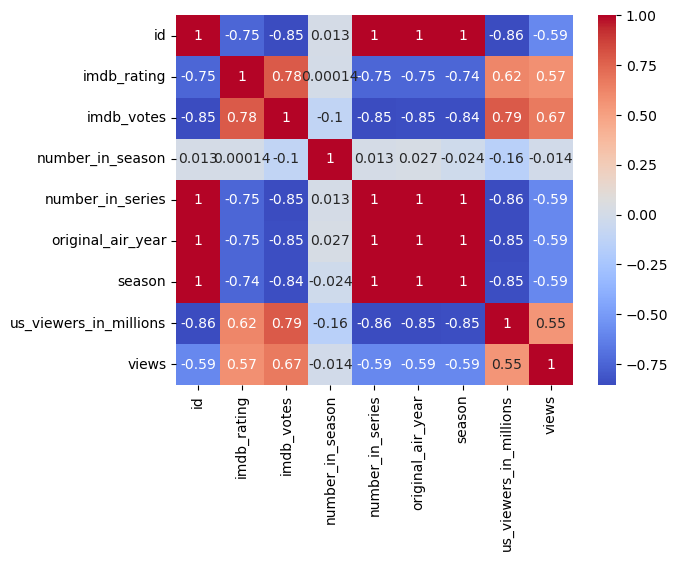

In [13]:
#heatmap display corrilation between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# heatmap shows:
#strong posivie corrilation between:
#IMBD rating and IMBD votes
#IMDB votes and US viewers (millions)
#IMDB rating and US viewers (millions)

#strong negative corrilation between:
#US viewers (millions) and Season
#US viewers (millions) and Origional air year
#US viewers (millions) and Number in series
#these negative corrilations are also present when comparing the above variables to IMDB rating

#the corrilations shown show that as the show has gone on, there have been less viewers and the ratings have gone down since it peaked

Text(0, 0.5, 'US Viewers in Millions')

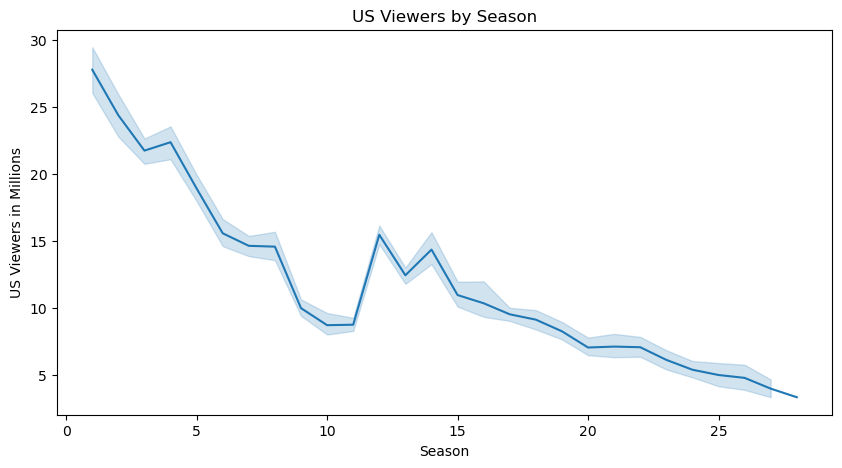

In [16]:
#line polt of US viewers in millions by season

plt.figure(figsize=(10,5))
sns.lineplot(x='season', y='us_viewers_in_millions', data=df)
plt.title('US Viewers by Season')
plt.xlabel('Season')
plt.ylabel('US Viewers in Millions')

The above plot visualises that The Simpsons peaked in viewership in the first season and has been declining ever since. 

This decrease initally bottomed out at season 10 which is largley considered to be the shows weakest season by critics. 

This regained audiance was short lived with the show returning to it's downward from season 15 onwards.

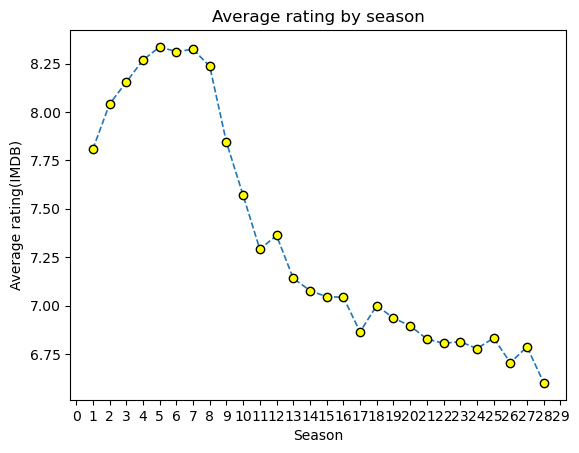

In [24]:
#plot of average IMDB rating by season
df.groupby('season')['imdb_rating'].mean().plot(linestyle='--', marker='o', mfc='yellow', mec='black', linewidth=1.2)
plt.xticks((np.arange(0, 30, step=1)))
plt.xlabel('Season')
plt.ylabel('Average rating(IMDB)')
plt.title('Average rating by season')
plt.show()

In [28]:
#heatmap of Lowest IMDB rated episodes by season
worst_episodes = df.pivot_table(index='season', columns='number_in_season', values='imdb_rating')
worst_episodes.head()


number_in_season,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
season,,,,,,,,,,,,,,,,,,,,,
1,8.2,7.8,7.5,7.8,8.1,7.6,7.9,7.7,7.5,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.2,8.3,8.2,8.1,7.5,8.0,7.7,8.4,8.1,7.8,...,7.5,7.6,8.0,8.5,7.9,8.4,8.0,NaN,NaN,NaN
3,8.6,7.7,8.2,8.7,8.5,7.7,8.2,7.9,7.9,8.8,...,8.3,8.6,8.2,7.7,7.9,8.2,7.7,7.8,8.2,NaN
4,8.4,8.1,9.0,7.8,8.4,8.2,7.8,8.2,8.8,8.5,...,8.3,9.0,7.2,8.1,8.1,7.7,8.2,NaN,NaN,NaN
5,8.4,9.0,8.6,8.9,8.7,8.0,7.7,8.7,8.4,8.5,...,8.5,7.9,8.4,8.4,8.2,7.5,8.0,NaN,NaN,NaN


<AxesSubplot:xlabel='number_in_season', ylabel='season'>

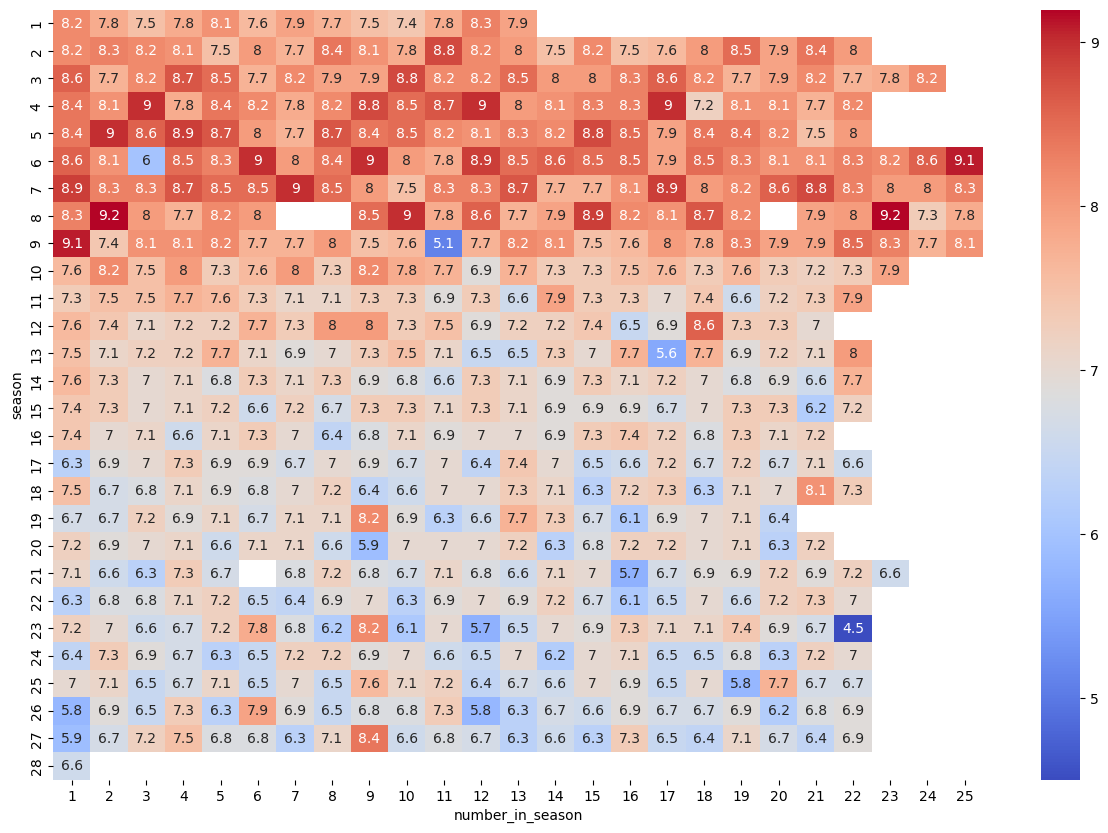

In [29]:
#heatmap of lowest IMDB rated episodes by season
plt.figure(figsize=(15,10))
sns.heatmap(worst_episodes, cmap='coolwarm', annot=True)

Heatmap again visualises the drop off in the show's quality with the majority of the episodes struggling to reach a 7 rating on IMDB followng the 16th season